# webscraping

## play by play data from bball ref

In [58]:
import pandas as pd
import requests, bs4, re
from bs4 import BeautifulSoup as bs
from time import sleep

### Get links of play-by-play pages of all games of a season

In [119]:
#defining function to flatten scraped data


#each final row: awaylayupattmp, awaylongtwoattmpt, awaythreeattmp, awaydistance, awaymake, awayassist, awayft, awaydr, awayor
#                 homelayupattmp, homelongtwoattmp, homethreeattmp, homedistance, homemake, homeassist, homeft, homedr, homeor
def flatten(trs):
    rows = []
    index=[1,5]
    myregex = re.compile('(\d+) ft')

    for tr in trs[3:]:

        tds=tr.find_all('td')
        row = [td.text for td in tds]
        if len(row) != 6:
            continue
        slicedrow=[row[i] for i in index]

        finalrow={'awaylayupattmp':0, 'awaylongtwoattmp':0, 'awaythreeattmp':0, 'awaydistance':0, 'awaymake':0, 'awayassist':0, 'awayft':0, 'awaydr':0, 'awayor':0, 
              'homelayupattmp':0, 'homelongtwoattmp':0, 'homethreeattmp':0, 'homedistance':0, 'homemake':0, 'homeassist':0, 'homeft':0, 'homedr':0, 'homeor':0}


        #away team fg
        if '-pt ' in slicedrow[0]:
            if ' ft' in slicedrow[0]:
                finalrow['awaydistance']=myregex.findall(slicedrow[0])[0]
            if ' rim' in slicedrow[0]:
                finalrow['awaydistance']=0
            if " makes " in slicedrow[0]:
                finalrow['awaymake']=1
                if 'assist ' in slicedrow[0]:
                    finalrow['awayassist']=1
            if (' 2-pt layup ' in slicedrow[0]) or (' 2-pt dunk ' in slicedrow[0]):
                finalrow['awaylayupattmp']=1
            if (' 2-pt ' in slicedrow[0]) and (' shot ' in slicedrow[0]):
                finalrow['awaylongtwoattmp']=1
            if (' 3-pt ' in slicedrow[0]):
                finalrow['awaythreeattmp']=1

        #away team ft
        elif ' free throw ' in slicedrow[0]:
            finalrow['awayft']=1
            if " makes " in slicedrow[0]:
                finalrow['awaymake']=1

        #away team rebound (not counting team rebound)
        elif ('Defensive rebound ' in slicedrow[0]) and (' by Team' not in slicedrow[0]):
            finalrow['awaydr']=1
        elif ("Offensive rebound " in slicedrow[0]) and (' by Team' not in slicedrow[0]):
            finalrow['awayor']=1    

        #home team fg
        elif '-pt ' in slicedrow[1]:
            if ' ft' in slicedrow[1]:
                finalrow['homedistance']=myregex.findall(slicedrow[1])[0]
            if ' rim' in slicedrow[1]:
                finalrow['homedistance']=0
            if " makes " in slicedrow[1]:
                finalrow['homemake']=1
                if 'assist ' in slicedrow[1]:
                    finalrow['homeassist']=1
            if (' 2-pt layup ' in slicedrow[1]) or (' 2-pt dunk ' in slicedrow[1]):
                finalrow['homelayupattmp']=1
            if (' 2-pt ' in slicedrow[1]) and (' shot ' in slicedrow[1]):
                finalrow['homelongtwoattmp']=1
            if (' 3-pt ' in slicedrow[1]):
                finalrow['homethreeattmp']=1                    

        #home team ft
        elif ' free throw ' in slicedrow[1]:
            finalrow['homeft']=1
            if " makes " in slicedrow[1]:
                finalrow['homemake']=1            

        #home team rebound (not counting team rebound)
        elif ('Defensive rebound ' in slicedrow[1]) and (' by Team' not in slicedrow[1]):
            finalrow['homedr']=1
        elif ("Offensive rebound " in slicedrow[1]) and (' by Team' not in slicedrow[1]):
            finalrow['homeor']=1                



        else:
            continue
        #print(True)
        rows.append(finalrow)
    return rows

In [61]:
#Yearlinks=[]
finaldict={}
for year in range(1998,2023):
    print(year)
    finaldict[year]=[]
    sleep(3.5)
    url = 'https://www.basketball-reference.com/leagues/NBA_'+str(year)+'_games.html'
    #Yearlinks.append(year)
    response = requests.get(url)
    status = response.status_code
    if status == 200:
      page = response.text
      soup = bs(page)
    else:
      print(f"Oops! Received status code {status}")
    
    monthdiv=soup.find('div', class_='filter')
    months=monthdiv.find_all('a')
    monthlinks=[]
    for month in months:
        link='https://www.basketball-reference.com/'+month['href']
        monthlinks.append(link)
    
    gamelinks=[]
    for link in monthlinks:
        print(link)
        url = link
        response = requests.get(url)
        status = response.status_code
        if status == 200:
          page = response.text
          soup = bs(page)
        else:
          print(f"Oops! Received status code {status}")

        table=soup.find('table', id='schedule')
        games=table.find_all('a', href=True, text='Box Score')
        for game in games:
            link='https://www.basketball-reference.com/boxscores/pbp/'+game['href'][11:]
            gamelinks.append(link)
            gameattemptdistances=shotdist(link)
            finaldict[year]=finaldict[year]+gameattemptdistances

1998
https://www.basketball-reference.com//leagues/NBA_1998_games-october.html
https://www.basketball-reference.com//leagues/NBA_1998_games-november.html
https://www.basketball-reference.com//leagues/NBA_1998_games-december.html
https://www.basketball-reference.com//leagues/NBA_1998_games-january.html
https://www.basketball-reference.com//leagues/NBA_1998_games-february.html
https://www.basketball-reference.com//leagues/NBA_1998_games-march.html
https://www.basketball-reference.com//leagues/NBA_1998_games-april.html
https://www.basketball-reference.com//leagues/NBA_1998_games-may.html
https://www.basketball-reference.com//leagues/NBA_1998_games-june.html
1999
https://www.basketball-reference.com//leagues/NBA_1999_games-february.html
https://www.basketball-reference.com//leagues/NBA_1999_games-march.html
https://www.basketball-reference.com//leagues/NBA_1999_games-april.html
https://www.basketball-reference.com//leagues/NBA_1999_games-may.html
https://www.basketball-reference.com//leagu

In [62]:
#save object as .pickle
import pickle

with open('shotlocation.pickle', 'wb') as handle:
    pickle.dump(finaldict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [69]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

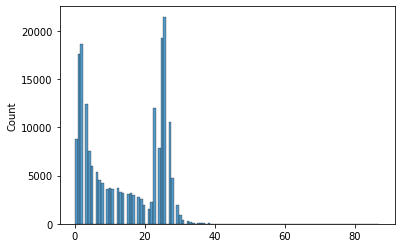

In [93]:
sns.histplot(finaldict[2021])

In [68]:
len(finaldict)

25

In [11]:
url = 'https://www.basketball-reference.com/leagues/NBA_2009_games.html'
response = requests.get(url)
status = response.status_code
if status == 200:
  page = response.text
  soup = bs(page)
else:
  print(f"Oops! Received status code {status}")

In [12]:
monthdiv=soup.find('div', class_='filter')

In [13]:
months=monthdiv.find_all('a')

In [14]:
monthlinks=[]
for month in months:
    link='https://www.basketball-reference.com/'+month['href']
    monthlinks.append(link)

monthlinks

['https://www.basketball-reference.com//leagues/NBA_2009_games-october.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-november.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-december.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-january.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-february.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-march.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-april.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-may.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-june.html']

In [15]:
gamelinks=[]
for link in monthlinks:
    
    url = link
    response = requests.get(url)
    status = response.status_code
    if status == 200:
      page = response.text
      soup = bs(page)
    else:
      print(f"Oops! Received status code {status}")
    
    table=soup.find('table', id='schedule')
    games=table.find_all('a', href=True, text='Box Score')
    for game in games:
        link='https://www.basketball-reference.com/boxscores/pbp/'+game['href'][11:]
        gamelinks.append(link)
        

In [16]:
#looks like the links contain both regular season and playoff
gamelinks[-5:]

['https://www.basketball-reference.com/boxscores/pbp/200906040LAL.html',
 'https://www.basketball-reference.com/boxscores/pbp/200906070LAL.html',
 'https://www.basketball-reference.com/boxscores/pbp/200906090ORL.html',
 'https://www.basketball-reference.com/boxscores/pbp/200906110ORL.html',
 'https://www.basketball-reference.com/boxscores/pbp/200906140ORL.html']

### Get stats from every game of the season

In [20]:
#defining function to flatten scraped data


#each final row: awaylayupattmp, awaylongtwoattmpt, awaythreeattmp, awaydistance, awaymake, awayassist, awayft, awaydr, awayor
#                 homelayupattmp, homelongtwoattmp, homethreeattmp, homedistance, homemake, homeassist, homeft, homedr, homeor
def flatten(trs):
    rows = []
    index=[1,5]
    myregex = re.compile('(\d+) ft')

    for tr in trs[3:]:

        tds=tr.find_all('td')
        row = [td.text for td in tds]
        if len(row) != 6:
            continue
        slicedrow=[row[i] for i in index]

        finalrow={'awaylayupattmp':0, 'awaylongtwoattmp':0, 'awaythreeattmp':0, 'awaydistance':0, 'awaymake':0, 'awayassist':0, 'awayft':0, 'awaydr':0, 'awayor':0, 
              'homelayupattmp':0, 'homelongtwoattmp':0, 'homethreeattmp':0, 'homedistance':0, 'homemake':0, 'homeassist':0, 'homeft':0, 'homedr':0, 'homeor':0}


        #away team fg
        if '-pt ' in slicedrow[0]:
            if ' ft' in slicedrow[0]:
                finalrow['awaydistance']=myregex.findall(slicedrow[0])[0]
            if ' rim' in slicedrow[0]:
                finalrow['awaydistance']=0
            if " makes " in slicedrow[0]:
                finalrow['awaymake']=1
                if 'assist ' in slicedrow[0]:
                    finalrow['awayassist']=1
            if (' 2-pt layup ' in slicedrow[0]) or (' 2-pt dunk ' in slicedrow[0]):
                finalrow['awaylayupattmp']=1
            if (' 2-pt ' in slicedrow[0]) and (' shot ' in slicedrow[0]):
                finalrow['awaylongtwoattmp']=1
            if (' 3-pt ' in slicedrow[0]):
                finalrow['awaythreeattmp']=1

        #away team ft
        elif ' free throw ' in slicedrow[0]:
            finalrow['awayft']=1
            if " makes " in slicedrow[0]:
                finalrow['awaymake']=1

        #away team rebound (not counting team rebound)
        elif ('Defensive rebound ' in slicedrow[0]) and (' by Team' not in slicedrow[0]):
            finalrow['awaydr']=1
        elif ("Offensive rebound " in slicedrow[0]) and (' by Team' not in slicedrow[0]):
            finalrow['awayor']=1    

        #home team fg
        elif '-pt ' in slicedrow[1]:
            if ' ft' in slicedrow[1]:
                finalrow['homedistance']=myregex.findall(slicedrow[1])[0]
            if ' rim' in slicedrow[1]:
                finalrow['homedistance']=0
            if " makes " in slicedrow[1]:
                finalrow['homemake']=1
                if 'assist ' in slicedrow[1]:
                    finalrow['homeassist']=1
            if (' 2-pt layup ' in slicedrow[1]) or (' 2-pt dunk ' in slicedrow[1]):
                finalrow['homelayupattmp']=1
            if (' 2-pt ' in slicedrow[1]) and (' shot ' in slicedrow[1]):
                finalrow['homelongtwoattmp']=1
            if (' 3-pt ' in slicedrow[1]):
                finalrow['homethreeattmp']=1                    

        #home team ft
        elif ' free throw ' in slicedrow[1]:
            finalrow['homeft']=1
            if " makes " in slicedrow[1]:
                finalrow['homemake']=1            

        #home team rebound (not counting team rebound)
        elif ('Defensive rebound ' in slicedrow[1]) and (' by Team' not in slicedrow[1]):
            finalrow['homedr']=1
        elif ("Offensive rebound " in slicedrow[1]) and (' by Team' not in slicedrow[1]):
            finalrow['homeor']=1                

            
        else:
            continue
        #print(True)
        rows.append(finalrow)
    return rows

In [57]:
#defining function for turning scraped dict into list of shot distance
def shotdist(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
      page = response.text
      soup = bs(page)
    else:
      print(f"Oops! Received status code {status}")

    table=soup.find('table', id='pbp')
    trs=table.find_all('tr')
    rows=flatten(trs)
    df = pd.DataFrame(rows) #turn dict into df
    df=df.astype(int)
    awayattemptdf=df[(df['awaylayupattmp']==1) | (df['awaylongtwoattmp']==1) | (df['awaythreeattmp']==1)] #away team attempt df
    homeattemptdf=df[(df['homelayupattmp']==1) | (df['homelongtwoattmp']==1) | (df['homethreeattmp']==1)] #home team attempt df
    gameattempts=awayattemptdf.awaydistance.tolist()+homeattemptdf.homedistance.tolist() #list of shot attempt distances of a game

    return gameattempts
    

In [24]:
df = pd.DataFrame(rows)

In [2]:
url = 'https://www.basketball-reference.com/boxscores/pbp/202012230DEN.html'
response = requests.get(url)
status = response.status_code
if status == 200:
  page = response.text
  soup = bs(page)
else:
  print(f"Oops! Received status code {status}")

In [3]:
page[:100]

'\n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/bbr/build" itemscope itemtype="https:'

In [4]:
table=soup.find('table', id='pbp')

In [5]:
trs=table.find_all('tr')

In [123]:
df = pd.DataFrame(rows)

In [46]:
df.dtypes

awaylayupattmp       int64
awaylongtwoattmp     int64
awaythreeattmp       int64
awaydistance        object
awaymake             int64
awayassist           int64
awayft               int64
awaydr               int64
awayor               int64
homelayupattmp       int64
homelongtwoattmp     int64
homethreeattmp       int64
homedistance        object
homemake             int64
homeassist           int64
homeft               int64
homedr               int64
homeor               int64
dtype: object

In [47]:
df=df.astype(int)

In [48]:
df.dtypes

awaylayupattmp      int32
awaylongtwoattmp    int32
awaythreeattmp      int32
awaydistance        int32
awaymake            int32
awayassist          int32
awayft              int32
awaydr              int32
awayor              int32
homelayupattmp      int32
homelongtwoattmp    int32
homethreeattmp      int32
homedistance        int32
homemake            int32
homeassist          int32
homeft              int32
homedr              int32
homeor              int32
dtype: object

In [31]:
#df of total attempts (away and home)
awayattemptdf=df[(df['awaylayupattmp']==1) | (df['awaylongtwoattmp']==1) | (df['awaythreeattmp']==1)]
homeattemptdf=df[(df['homelayupattmp']==1) | (df['homelongtwoattmp']==1) | (df['homethreeattmp']==1)]

In [36]:
awayattemptdf.awaydistance.tolist()+homeattemptdf.homedistance.tolist()

[0,
 0,
 '16',
 '19',
 0,
 '8',
 '9',
 '11',
 '9',
 '15',
 '13',
 0,
 '9',
 0,
 '20',
 '25',
 0,
 '25',
 0,
 0,
 '16',
 '16',
 '25',
 '6',
 '26',
 '9',
 '14',
 '21',
 0,
 0,
 '25',
 '12',
 0,
 '25',
 '26',
 '14',
 '26',
 0,
 0,
 0,
 '15',
 '22',
 '20',
 '26',
 '20',
 '17',
 '21',
 '23',
 '24',
 '6',
 0,
 '18',
 '6',
 '15',
 0,
 0,
 '17',
 '14',
 '11',
 '20',
 '16',
 0,
 '24',
 '14',
 '25',
 '14',
 0,
 '17',
 0,
 0,
 '27',
 0,
 0,
 '26',
 '9',
 '14',
 '6',
 '24',
 '20',
 '20',
 '24',
 '26',
 0,
 '5',
 0,
 0,
 0,
 0,
 0,
 '23',
 0,
 '25',
 '26',
 '8',
 '15',
 '7',
 0,
 0,
 '7',
 '6',
 0,
 0,
 '25',
 '8',
 '17',
 0,
 0,
 '14',
 '18',
 0,
 0,
 0,
 '12',
 '20',
 '25',
 0,
 '24',
 '25',
 0,
 0,
 '14',
 '15',
 0,
 '12',
 '24',
 0,
 '24',
 '18',
 '20',
 '24',
 0,
 '7',
 '24',
 '7',
 '27',
 '24',
 '16',
 0,
 '23',
 0,
 '42',
 '23',
 '8',
 '24',
 '10',
 '24',
 '26',
 '20',
 0,
 '24',
 '25',
 '26',
 0,
 '23',
 '25',
 '9',
 '27',
 0,
 '26']

In [ ]:
awayattemptdf.awaydistance

In [156]:
href="/boxscores/200810280BOS.html"

In [157]:
href[11:]

'200810280BOS.html'

In [41]:
a=[1,2,3]
b=[2,3,4]

In [42]:
a=a+b

In [43]:
a

[1, 2, 3, 2, 3, 4]